<a href="https://colab.research.google.com/github/aisha-partha/Delivery-Demand-Prediction/blob/main/Delivery_Demand_Prediction_EDA_Aishwarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary

The food delivery time prediction model plays a crucial role in the food delivery industry, where prompt and accurate delivery is of utmost importance. Delivery time directly impacts customer satisfaction and influences their overall experience.

To develop an effective prediction model, we began by thoroughly cleaning the dataset, ensuring it was free from errors and inconsistencies. This step was vital in ensuring the reliability and accuracy of the model's predictions.

Feature engineering was then employed to extract valuable insights from the dataset. By considering factors such as delivery person age, ratings, location coordinates, and time-related variables, we aimed to capture key variables that influence delivery time. These engineered features contributed to the model's predictive capabilities.

Using regression algorithms like linear regression, decision tree, random forest,XGBoost we built the predictive model. It was trained on a subset of the dataset using techniques like cross-validation to ensure robustness. Evaluation metrics such as mean squared error (MSE) and R-squared (R2) score were used to assess the model's accuracy. The food delivery time prediction model empowers businesses to optimize their operations and improve the overall delivery experience for their customers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Load and Understand the data

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [5]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [8]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [9]:
#checking for null values

df_train.columns[df_train.isnull().any()].tolist()

[]

Observations:

Data Formatting will be required for Weatherconditions & Time_taken(min) column.
Both numerical & categorical features are present.
ID & Delivery_person_ID will not be used to build the model.

In [10]:
#Explore each column
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
4607    1
1F3E    1
E251    1
3F31    1
4A78    1
       ..
C3F1    1
5DB7    1
1985    1
CEDA    1
5FB2    1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES11DEL02     66
                  ..
DEHRES18DEL03      7
AURGRES11DEL03     7
KOLRES09DEL03      6
KOCRES16DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_person_Ratings
Delivery_person_Ratings
4.8     71

Data Cleaning

In [11]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    df.rename(columns={'Time_taken(min)': 'Time_taken_in_min'},inplace=True)
    df.columns = [x.lower() for x in df.columns]


update_column_name(df_train)
print(df_train.columns)

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_in_min'],
      dtype='object')


In [12]:
df_train['delivery_person_id'].value_counts()

,count
delivery_person_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES11DEL02,66
...,...
DEHRES18DEL03,7
AURGRES11DEL03,7
KOLRES09DEL03,6


In [13]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['time_taken_in_min'] = df['time_taken_in_min'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['weather_conditions'] = df['weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['city_code']=df['delivery_person_id'].str.split("RES", expand=True)[0]

extract_column_value(df_train)
df_train[['time_taken_in_min','weather_conditions','city_code']].head()

,time_taken_in_min,weather_conditions,city_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [14]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [15]:
#Update datatypes
def update_datatype(df):
    df['delivery_person_age'] = df['delivery_person_age'].astype('float64')
    df['delivery_person_ratings'] = df['delivery_person_ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['order_date']=pd.to_datetime(df['order_date'],format="%d-%m-%Y")

update_datatype(df_train)

In [16]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)
    df.replace('nan', float(np.nan), regex=True,inplace=True)
convert_nan(df_train)

In [17]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

,0
delivery_person_ratings,1908
delivery_person_age,1854
time_orderd,1731
city,1200
multiple_deliveries,993
weather_conditions,616
road_traffic_density,601
festival,228
id,0
vehicle_condition,0


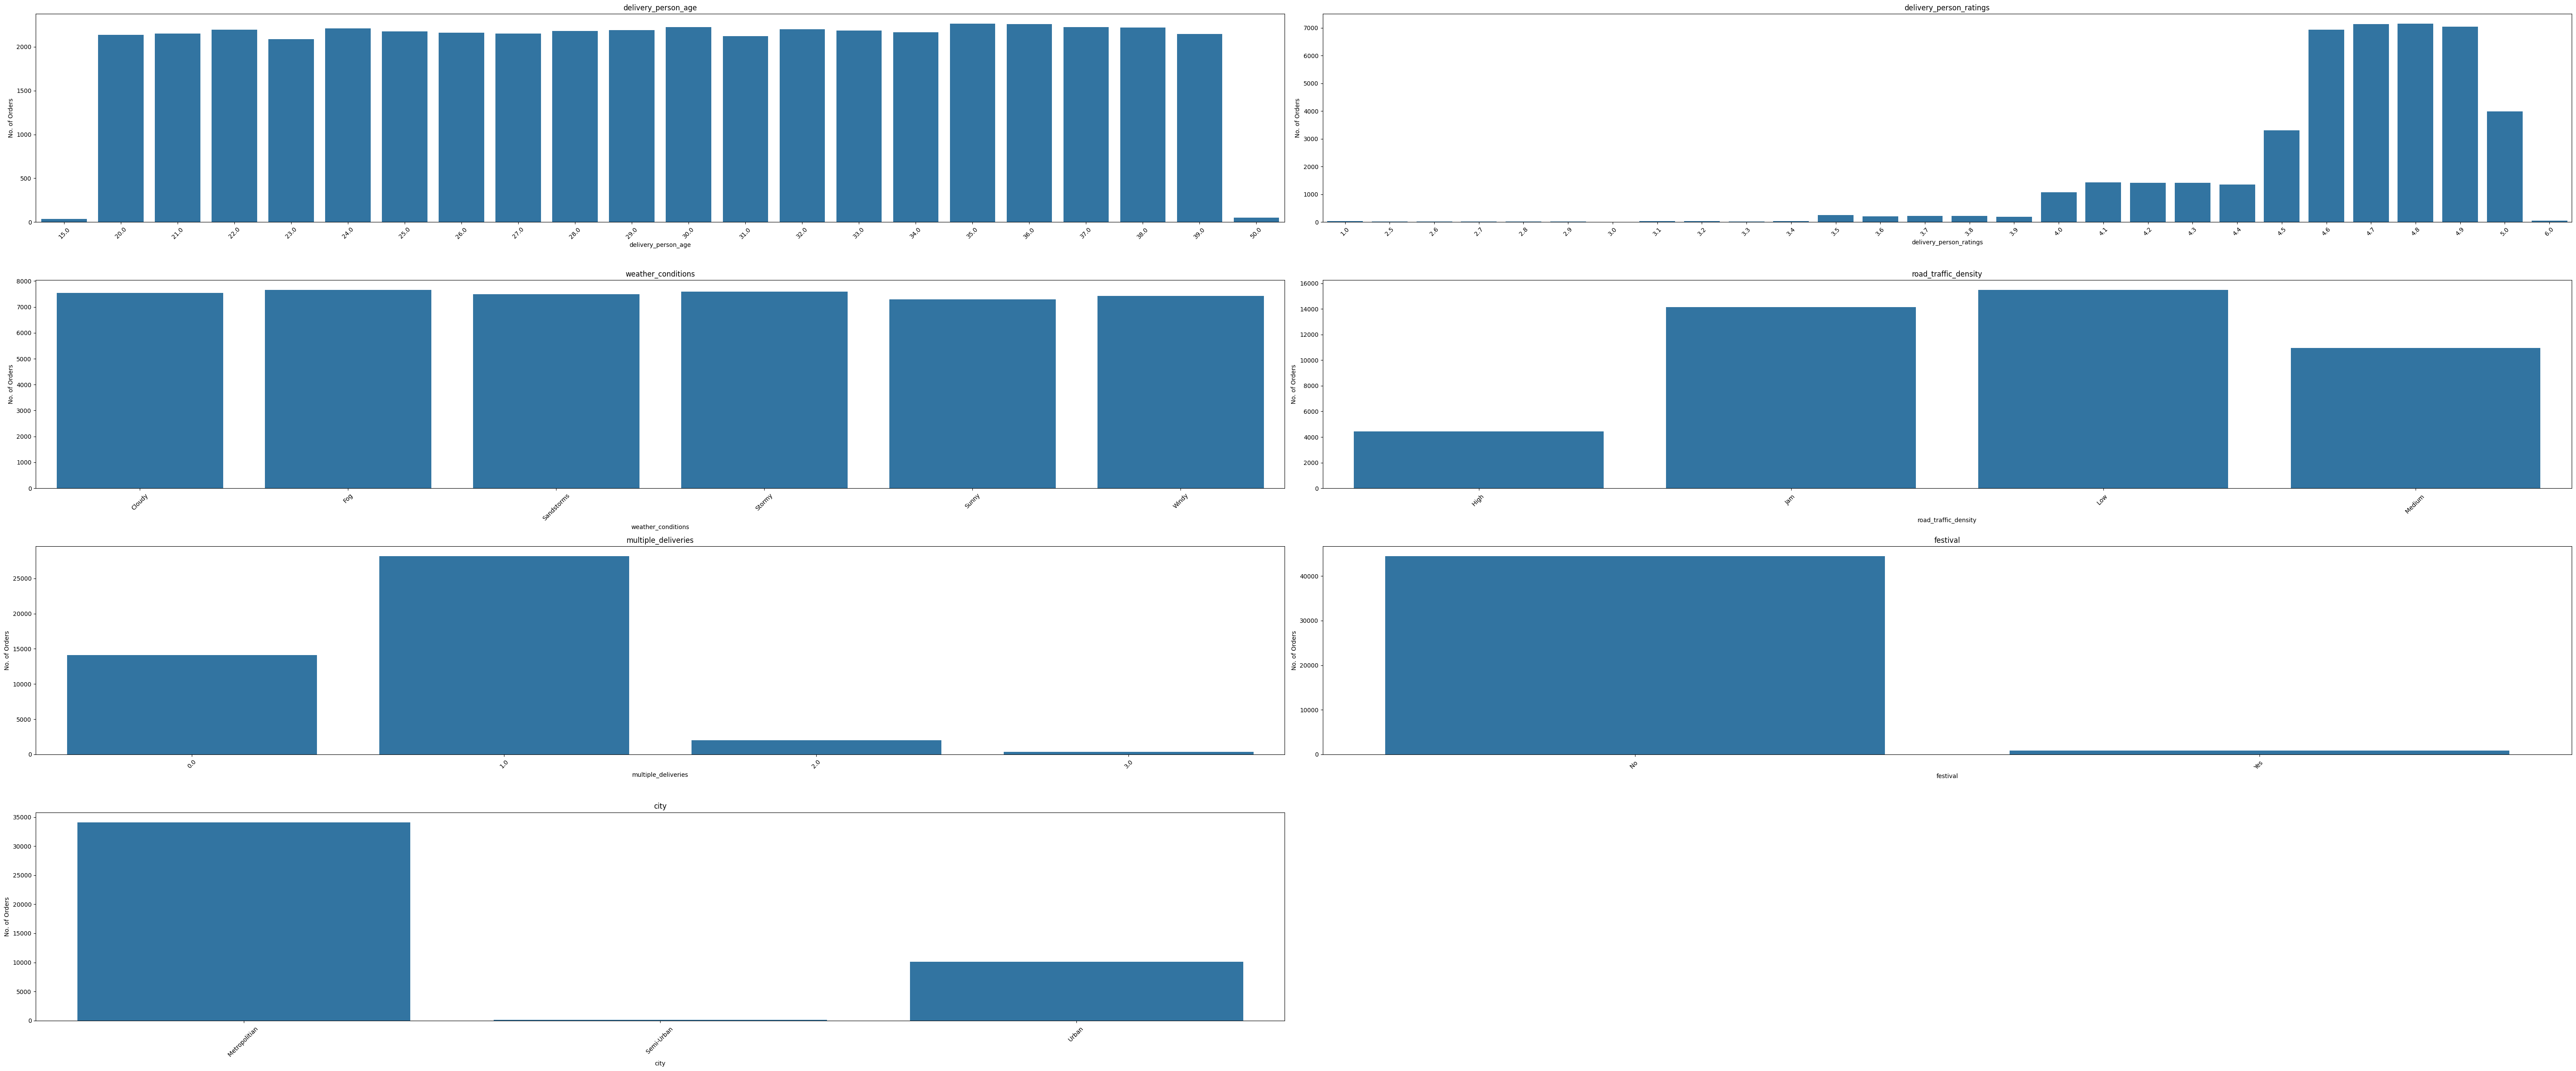

In [18]:
#Let's explore columns that have null values
cols = ['delivery_person_age','delivery_person_ratings','weather_conditions','road_traffic_density','multiple_deliveries','festival','city']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(60,25))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [19]:
#Handle null values
def handle_null_values(df):
    df['delivery_person_age'].fillna(np.random.choice(df['delivery_person_age']), inplace=True)
    df['weather_conditions'].fillna(np.random.choice(df['weather_conditions']), inplace=True)
    df['city'].fillna(df['city'].mode()[0], inplace=True)
    df['festival'].fillna(df['festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['road_traffic_density'].fillna(df['road_traffic_density'].mode()[0], inplace=True)
    df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].median(), inplace=True)
    df.replace(np.nan,np.random.choice(df['delivery_person_age']) , regex=True,inplace=True)

handle_null_values(df_train)
df_train.isnull().sum()

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_orderd,0


In [20]:
df_train.isnull().sum()

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_orderd,0


In [22]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['id','delivery_person_id'],axis=1,inplace=True)

print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


#Vizualizations

In [24]:
import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

In [25]:
# https://github.com/covid19india/covid19india-react/blob/master/public/maps/india.json

In [26]:
india_geojson=geopandas.read_file('india.json')
india_geojson.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.9468 23.51363,..."
1,None,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,None,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,None,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.9315 22.39458,..."
4,None,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


<Axes: >

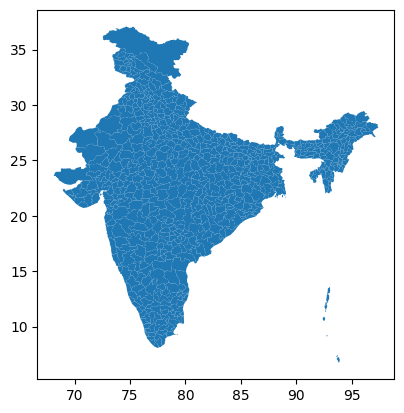

In [27]:
india_geojson.plot()

In [28]:
df_train['city'].value_counts()

,count
city,
Metropolitian,35293
Urban,10136
Semi-Urban,164


In [29]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [30]:
# Creating Basemap
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[22.7196, 75.8577],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

In [31]:
f1=folium.FeatureGroup("Delivery 1")

In [32]:
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_in_min,city_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [35]:
coords_1=[[ df_train['delivery_location_latitude'][0], df_train['delivery_location_longitude'][0]],[df_train['restaurant_latitude'][0], df_train['restaurant_longitude'][0]]]

In [36]:
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>Delivery_1</b>',tooltip='D_1',color='blue',weight=10).add_to(f1)

In [37]:
f1.add_to(m3)
folium.LayerControl().add_to(m3)
m3

In [38]:
df_indore_data = df_train[df_train['city_code']=='INDO']

In [39]:
df_indore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3159 entries, 0 to 45563
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   delivery_person_age          3159 non-null   float64       
 1   delivery_person_ratings      3159 non-null   float64       
 2   restaurant_latitude          3159 non-null   float64       
 3   restaurant_longitude         3159 non-null   float64       
 4   delivery_location_latitude   3159 non-null   float64       
 5   delivery_location_longitude  3159 non-null   float64       
 6   order_date                   3159 non-null   datetime64[ns]
 7   time_orderd                  3159 non-null   object        
 8   time_order_picked            3159 non-null   object        
 9   weather_conditions           3159 non-null   object        
 10  road_traffic_density         3159 non-null   object        
 11  vehicle_condition            3159 non-null   in

In [40]:
m = folium.Map([22.7196, 75.8577], zoom_start=11)

for _, row in df_indore_data.head(50).iterrows():
    folium.CircleMarker([row['restaurant_latitude'], row['restaurant_longitude']],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

    folium.CircleMarker([row['delivery_location_latitude'], row['delivery_location_longitude']],
                        radius=15,
                        fill_color="red", # divvy color
                       ).add_to(m)

    folium.PolyLine([[row['restaurant_latitude'], row['restaurant_longitude']],
                     [row['delivery_location_latitude'], row['delivery_location_longitude']]]).add_to(m)
m

# Feature Engineering

In [41]:
def extract_date_features(data):
    data["day"] = data.order_date.dt.day
    data["month"] = data.order_date.dt.month
    data["quarter"] = data.order_date.dt.quarter
    data["year"] = data.order_date.dt.year
    data['day_of_week'] = data.order_date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.order_date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.order_date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.order_date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.order_date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.order_date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.order_date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [44]:
#Calculate Time Differnce
'''
def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    df['time_orderd'] = pd.to_timedelta(df['time_orderd'])
    df['time_order_picked'] = pd.to_timedelta(df['time_order_picked'])

    df['time_order_picked_formatted'] = df['order_date'] + np.where(df['time_order_picked'] < df['time_orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['time_order_picked']
    df['time_ordered_formatted'] = df['order_date'] + df['time_orderd']

    df['order_prepare_time'] = (df['time_order_picked_formatted'] - df['time_ordered_formatted']).dt.total_seconds() / 60

    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop all the time & date related columns
    df.drop(['time_orderd', 'time_order_picked', 'time_ordered_formatted', 'time_order_picked_formatted', 'order_date'], axis=1, inplace=True)


calculate_time_diff(df_train)
df_train.head()
'''

"\ndef calculate_time_diff(df):\n    # Find the difference between ordered time & picked time\n    df['time_orderd'] = pd.to_timedelta(df['time_orderd'])\n    df['time_order_picked'] = pd.to_timedelta(df['time_order_picked'])\n\n    df['time_order_picked_formatted'] = df['order_date'] + np.where(df['time_order_picked'] < df['time_orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['time_order_picked']\n    df['time_ordered_formatted'] = df['order_date'] + df['time_orderd']\n\n    df['order_prepare_time'] = (df['time_order_picked_formatted'] - df['time_ordered_formatted']).dt.total_seconds() / 60\n\n    # Handle null values by filling with the median\n    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)\n\n    # Drop all the time & date related columns\n    df.drop(['time_orderd', 'time_order_picked', 'time_ordered_formatted', 'time_order_picked_formatted', 'order_date'], axis=1, inplace=True)\n\n\ncalculate_time_diff(df_train)\ndf_train.head()\n

In [43]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['restaurant_latitude','restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['delivery_location_latitude','delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")

calculate_distance(df_train)
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,2022,5,0,0,0,0,0,0,1,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,2022,4,0,0,0,0,0,0,0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,2022,5,0,0,0,0,0,0,1,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2022,1,0,0,0,0,0,0,0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,2022,5,0,0,0,0,0,0,1,6
